# OpenCV

---



## Introdução

---



O OpenCV-Python é uma biblioteca do Python projetada para resolver problemas de visão do computador. Comparado a linguagens como C / C ++, o Python é mais lento. Dito isso, o Python pode ser facilmente estendido com C / C ++, o que nos permite escrever códigos computacionalmente intensivos em C / C ++ e criar wrappers Python que podem ser usados ​​como módulos Python. O OpenCV-Python utiliza o Numpy, que é uma biblioteca altamente otimizada para operações numéricas. Todas as estruturas de matriz OpenCV são convertidas para e de matrizes Numpy. Isso também facilita a integração com outras bibliotecas que usam Numpy, como SciPy e Matplotlib.

Para instalar o opencv-python, utilizamos o gerenciador pip:

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Podemos então importar a biblioteca para o código.

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow 

(227, 231, 3)
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0 255 255]
  [  0 255 255]
  [  0 255 255]]]


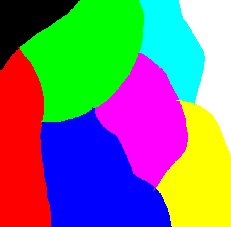

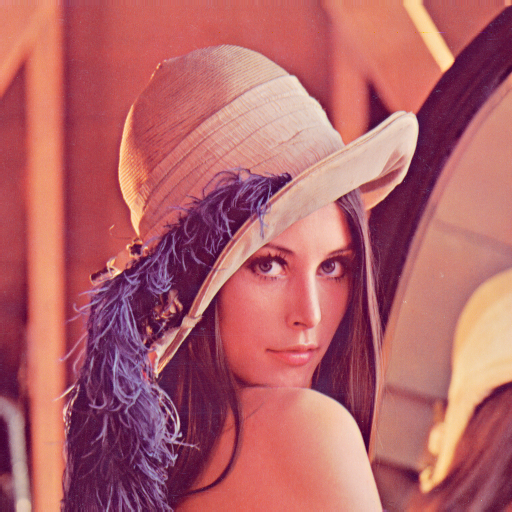

In [ ]:
img = cv.imread("cores.png") 
img2 = cv.imread("lenna.png")

print(img.shape)
print(img)

cv2_imshow(img)
cv2_imshow(img2)


#cv.imshow("top", img) #essas duas linhas são o imshow fora do collab 
#cv.waitKey(0)

## Pixels

---



Uma imagem é uma matriz de pixels, onde cada pixel é uma composição de 3 cores: Vermelho, Verde e Azul (RGB), podemos acessar cada pixel de forma isolada. 

Detalhe, o openCV utiliza o padrão BGR para definir a definição dos pixels, isso não modifica a formação das cores, somente a ordem de acesso.

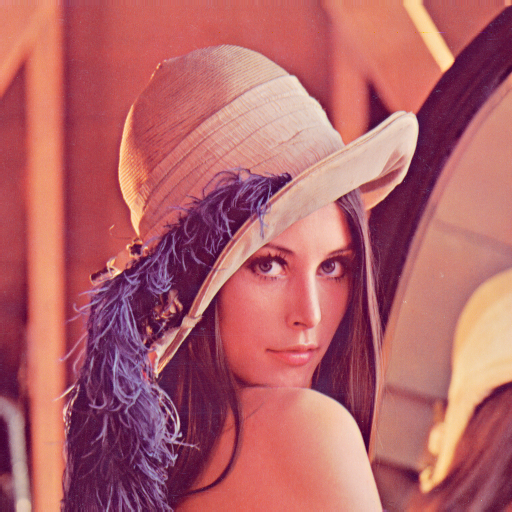

68
512
512


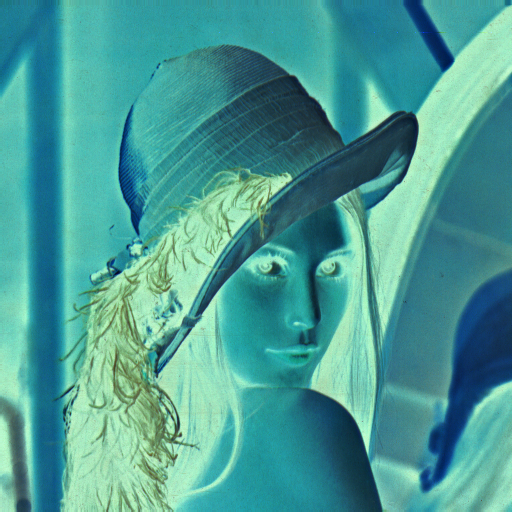

In [ ]:
img = cv.imread("lenna.png") 

cv2_imshow(img)

print(img[100, 100, 1])

print(img.shape[0]) 
print(img.shape[1])

for coluna in range(img.shape[0]):
  for linha in range(img.shape[1]):
    for pixel in range(3):
      img[coluna, linha, pixel] = 255 - img[coluna, linha, pixel]

cv2_imshow(img)

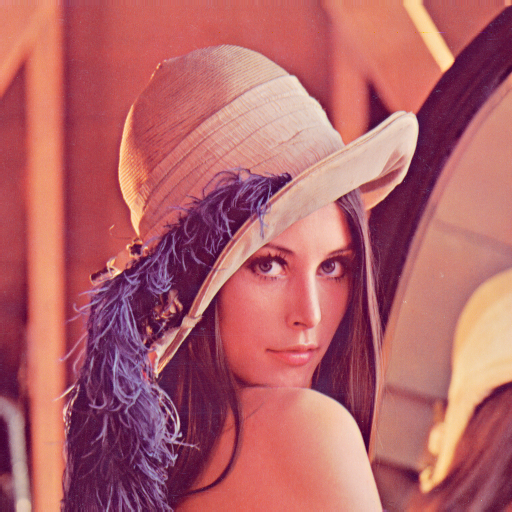

68
512
512


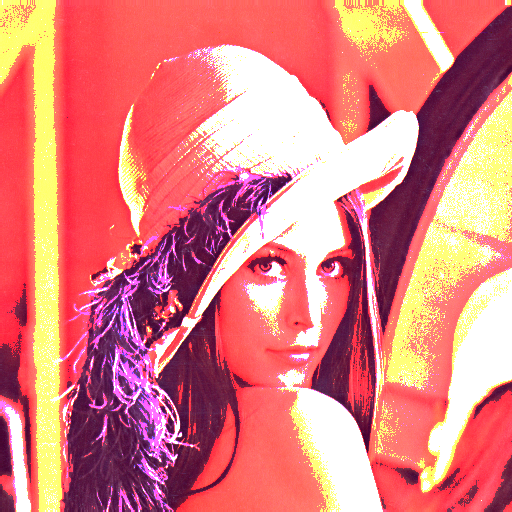

In [ ]:
img = cv.imread("lenna.png") 

limiar = 128

cv2_imshow(img)

print(img[100, 100, 1])

print(img.shape[0]) 
print(img.shape[1])

for coluna in range(img.shape[0]):
  for linha in range(img.shape[1]):
    for pixel in range(3):
      if img[coluna, linha, pixel] > limiar:
        img[coluna, linha, pixel] = 255

cv2_imshow(img)

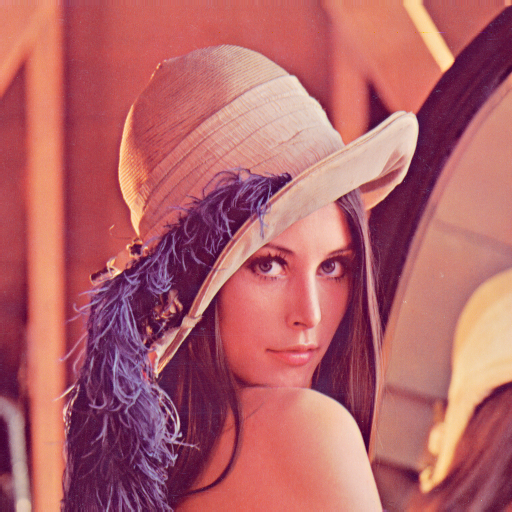

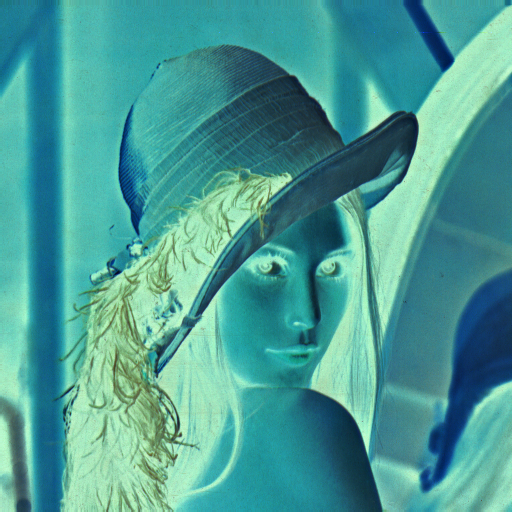

In [ ]:
img = cv.imread("lenna.png") 
cv2_imshow(img)

#print(img)

img = 255 - img

#print(img)

cv2_imshow(img)

Da mesma forma que um pixel é acessado ele pode ser modificado.

In [ ]:
imgTeste = cv.imread("lenna.png")
cv2_imshow(imgTeste)

#for linha in range(imgTeste.shape[0]):
#  for coluna in range(imgTeste.shape[1]):
#    imgTeste[linha, coluna, 0] = 255 - imgTeste[linha, coluna, 0]
#    imgTeste[linha, coluna, 1] = 255 - imgTeste[linha, coluna, 1]
#    imgTeste[linha, coluna, 2] = 255 - imgTeste[linha, coluna, 2]

imgTeste = 255 - imgTeste

cv2_imshow(imgTeste)



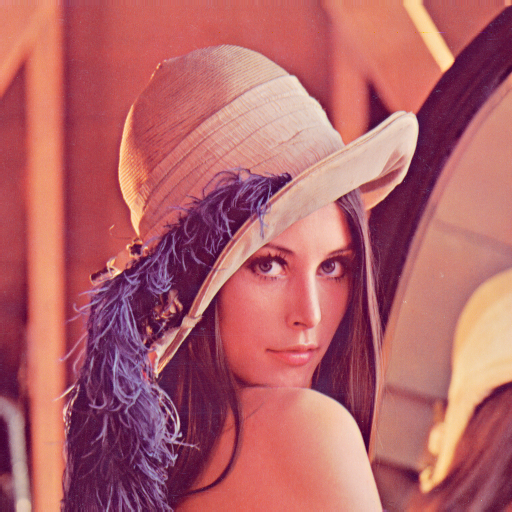

[137 226 137 ... 179 181 185]


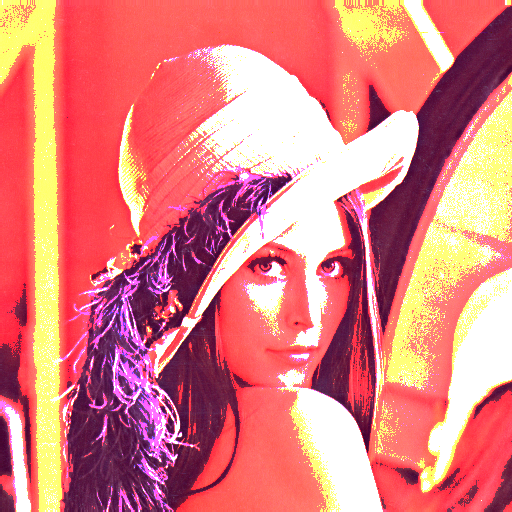

In [ ]:
img = cv.imread("lenna.png") 
cv2_imshow(img)

limiar = 128

print(img[img > 128])

#print(img)

img[img > 128] = 255

#print(img)

cv2_imshow(img)

## Propriedades de uma imagem

---



As propriedades da imagem incluem número de linhas, colunas e canais; tipo de dados da imagem; número de pixels; e assim por diante 

O formato de uma imagem é acessado por shape. Retorna uma tupla do número de linhas, colunas e canais (se a imagem for colorida). 

O total de valores é acessado pelo size e o tipo de dados da imagem é acessado por dtype.

In [ ]:
print(img2.shape) 
print(img2.size)
print(img2.dtype)

(512, 512, 3)
786432
uint8


## Região de Interesse

Às vezes, temos que definir uma região de interesse de uma imagem. Para a detecção dos olhos nas imagens, a primeira detecção de rosto é feita em toda a imagem. Quando um rosto é obtido, selecionamos a região do rosto sozinha e procuramos olhos dentro dela, em vez de pesquisar a imagem inteira. Melhora a precisão (porque os olhos estão sempre nos rostos) e o desempenho (porque procuramos em uma área pequena). 

A região é obtida novamente usando a indexação de Numpy

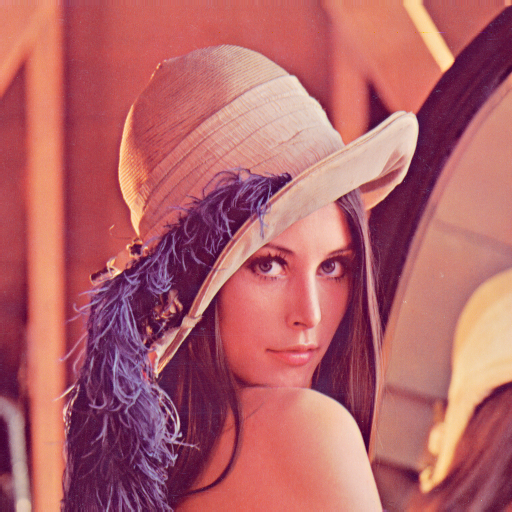

[[[ 78  68 178]
  [ 73  69 178]
  [ 84  70 174]
  ...
  [102  99 201]
  [114 105 191]
  [118 112 202]]

 [[ 95  85 170]
  [ 79  69 171]
  [ 79  70 175]
  ...
  [112 103 197]
  [119 118 206]
  [ 99 106 210]]

 [[ 73  63 172]
  [ 74  68 171]
  [ 81  72 176]
  ...
  [111 124 207]
  [115 116 208]
  [107 107 209]]

 ...

 [[ 76  64 175]
  [ 77  69 179]
  [ 79  64 176]
  ...
  [119  94 199]
  [121 107 208]
  [118 108 211]]

 [[ 69  54 174]
  [ 80  62 173]
  [ 76  68 176]
  ...
  [ 94  56 150]
  [115  88 185]
  [101  88 195]]

 [[ 68  61 173]
  [ 77  71 167]
  [ 73  62 173]
  ...
  [101  59 137]
  [ 94  55 140]
  [ 83  45 146]]]


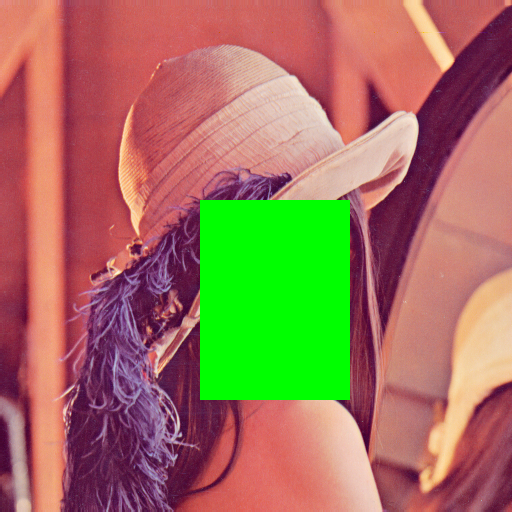

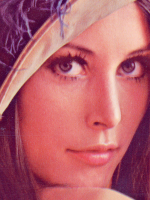

In [ ]:
img = cv.imread("lenna.png") 
cv2_imshow(img)

print(img[100:200, 100:200])

imgRosto = img[200:400, 200:350].copy()
img[200:400, 200:350] = [0, 255, 0]


cv2_imshow(img)
cv2_imshow(imgRosto)

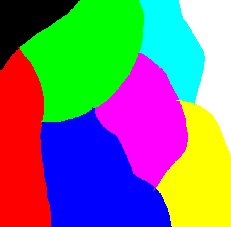

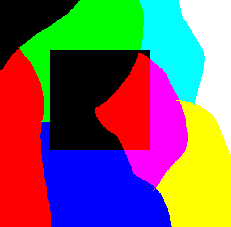

In [ ]:
img = cv.imread("cores.png") 
cv2_imshow(img)

img[50:150, 50:150, :2] = 0


cv2_imshow(img)

In [ ]:
teste = np.array([1, 2, 3, 4])
valor = teste[0]
fatia = teste[1:4]
print(valor)
print(fatia)

img_lena = img2.copy()
fatia = img_lena[200:350,300:400]

cv2_imshow(fatia)

cv2_imshow(img_lena)

In [ ]:
img_lena = img2.copy()

rosto = img_lena[200:400, 220:360] 
img_lena[0:200, 0:140] = rosto
img_lena[200:400, 0:140] = rosto
img_lena[0:200, 140:280] = rosto
img_lena[0:200, 280:420] = rosto
#img_lena = rosto
cv2_imshow(rosto)
cv2_imshow(img_lena)

## Espaço de Cor

---



Às vezes, você precisará trabalhar separadamente nos canais B, G, R de uma imagem. Nesse caso, você precisa dividir a imagem BGR em canais únicos. Em outros casos, pode ser necessário ingressar nesses canais individuais para criar uma imagem BGR. Você pode fazer isso simplesmente:

In [ ]:
print(img2.shape)

cv2_imshow(img2)
imgAzul = img2[:, :, 0]
print()
print(imgAzul.shape)
cv2_imshow(imgAzul)
imgVerde = img2[:, :, 1]
print()
cv2_imshow(imgVerde)
imgVermelho = img2[:, :, 2]
print()
cv2_imshow(imgVermelho)

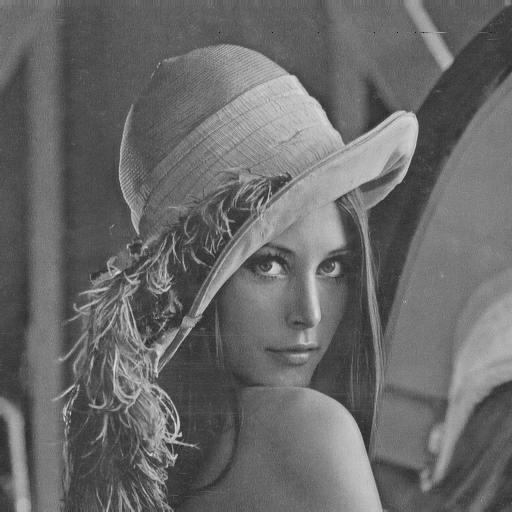

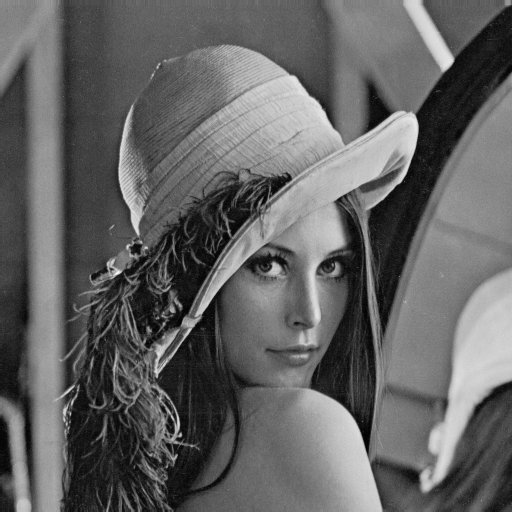

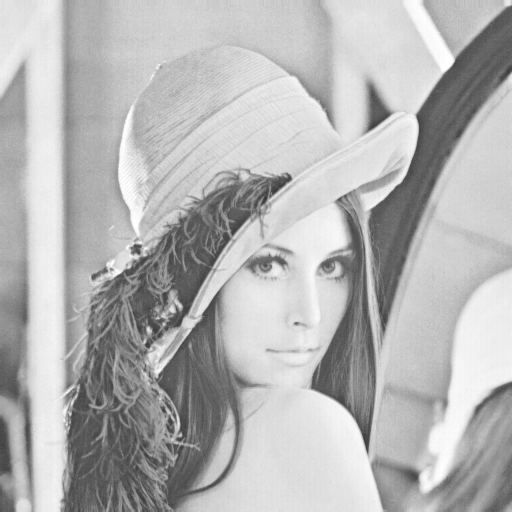

In [ ]:
img = cv.imread("lenna.png") 

imgAzul, imgVerde, imgVermelho = cv.split(img)

cv2_imshow(imgAzul)
cv2_imshow(imgVerde)
cv2_imshow(imgVermelho)



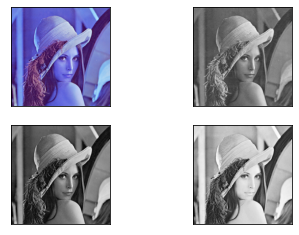

In [ ]:
img = cv.imread("lenna.png") 
img_c = img.copy()

b, g, r = cv.split(img_c)



imagens = [img_c, b, g, r]
from matplotlib import pyplot as plt
imagens[0] = cv.cvtColor(imagens[0], cv.COLOR_BGR2RGB)
for i in range(4): 
  plt.subplot(2,2,i+1),plt.imshow(imagens[i],'gray') 
  plt.xticks([]),plt.yticks([]) 
plt.show()


Também podemos utilizar o slicing

In [ ]:
img2 = img.copy()

b = img2[:,:,0] 
cv2_imshow(b)

In [ ]:
img2 = img.copy()

img2[:,:,2] = 0
cv2_imshow(img2)

Existem mais de 150 métodos de conversão de espaço de cores disponíveis no OpenCV. Como para o padrão HSV e escala de cinza, os mais utilizados são : BGR ↔ Cinza e BGR ↔ HSV. 

Para conversão de cores, usamos a função cvtColor (imagem, tipo) em que tipo determina o tipo de conversão. Para BGR → escala de cinza, usamos a flag cv2.COLOR_BGR2GRAY. Da mesma forma para BGR → HSV, usamos a flag cv.COLOR_BGR2HSV.

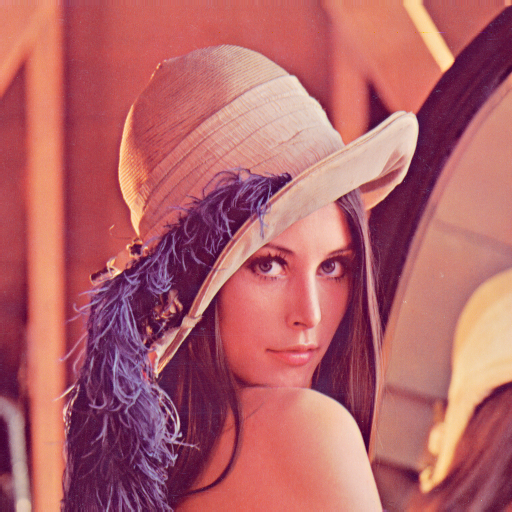

(512, 512, 3)


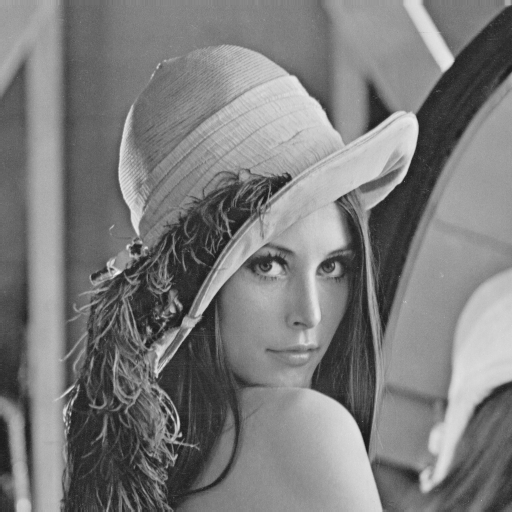

(512, 512)


In [ ]:
img2 = cv.imread("lenna.png") 
img3 = img2.copy()

cv2_imshow(img3)
print(img3.shape)

img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

cv2_imshow(img3)
print(img3.shape)
#cv.imwrite("Cinza.png", img2)

## Trabalhando com os pixels

---



O jeito comum é com laços de repetição aninhados

In [ ]:
img2 = cv.imread("lenna.png")

img_lena = img2.copy()




imagemCinza = cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY)


cv2_imshow(img_lena)
cv2_imshow(imagemCinza)

#for x in range(imagemCinza.shape[0]):
#  for y in range(imagemCinza.shape[1]):
#    if imagemCinza[x, y] > 150:
#      imagemCinza[x, y] = 255
#    else:
#      imagemCinza[x, y] = 0

filtroBranco = imagemCinza > 150
filtroPreto = imagemCinza <= 150

imagemCinza[filtroPreto] = 255

cv2_imshow(imagemCinza)


No python podemos utilizar os recursos do python

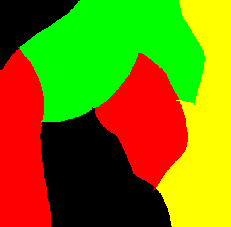

In [ ]:
img2 = img.copy()

img2[:, :, 0] = 0

cv2_imshow(img2)